In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# importing dataset
digit_mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

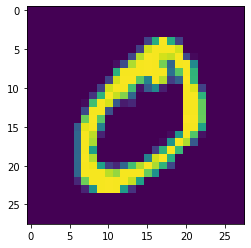

In [ ]:
plt.imshow(x_train_full[1])

In [ ]:
y_train_full[1]

0

In [ ]:
# feature scaling
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

In [ ]:
# Train_Valid_Test Split
x_valid, x_train = x_train_n[:6000],x_train_n[6000:]
y_valid, y_train = y_train_full[:6000],y_train_full[6000:]
x_test = x_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Model Building
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             metrics=['accuracy'],
             optimizer = 'adam')

In [ ]:
# model training
model_r = model.fit(x_train,y_train,epochs=20,
                         validation_data=(x_valid,y_valid))

Epoch 1/20
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2310 - accuracy: 0.9319 - val_loss: 0.1340 - val_accuracy: 0.9600
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0930 - accuracy: 0.9720 - val_loss: 0.0935 - val_accuracy: 0.9705
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0646 - accuracy: 0.9802 - val_loss: 0.0874 - val_accuracy: 0.9747
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.0812 - val_accuracy: 0.9777
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0380 - accuracy: 0.9873 - val_loss: 0.1052 - val_accuracy: 0.9723
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0890 - val_accuracy: 0.9752
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0871 - val_accuracy

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
# Val-loss
pd.DataFrame(model_r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# predicting first five Digits
x_new=x_test[:5]

In [ ]:
y_proba = model.predict(x_new)
y_proba.round(2)

In [ ]:
predict_x = model.predict(x_new) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
# Output
classes_x

In [ ]:
plt.imshow(x_test[1])